In [2]:
# Definiçao das librarias usadas neste trabalho
import matplotlib.pyplot as plt
import numpy as np
import cv2

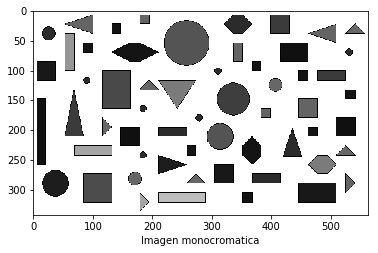

In [38]:
# Transformacao de Cores
# ler a imagem de entrada
image = cv2.imread("objetos2.png")

# Usase a funçao cvtColor para transformar a imagem BGR em escadas de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Salva-se a imagem
cv2.imwrite("gray_object_2.png",gray_image)

plt.imshow(gray_image, cmap=plt.cm.gray)
plt.xlabel('Imagen monocromatica')
plt.show()

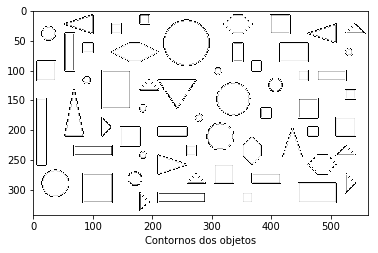

In [39]:
# Contornos dos Objetos

# Mascara 1
mask = [[0,-1,0],[-1,4,-1],[0,-1,0]]

# Mascara 2
mask2 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

# Filter2D realiza uma convoluçao entre a imagem em escalas de cinza
# e a mascara definida anteriormente
image_contour = cv2.filter2D(gray_image,-1,np.array(mask))

# Se salva a imagem
cv2.imwrite("contours_object_2.png",255 - image_contour)

# Se calcula o negativo da imagem de entrada para obter uma nova imagem com fundo
# branco e bordas pretas
plt.imshow(255 - image_contour, cmap=plt.cm.gray)
plt.xlabel('Contornos dos objetos')
plt.show()


Numero de regioes:  58

 regiao: 57 perimetro: 69.6568541527 area: 322.0
 regiao: 56 perimetro: 195.656854153 area: 1456.0
 regiao: 55 perimetro: 80.0832602978 area: 304.0
 regiao: 54 perimetro: 195.656854153 area: 2208.0
 regiao: 53 perimetro: 80.0832602978 area: 304.0
 regiao: 52 perimetro: 82.9116866589 area: 322.0
 regiao: 51 perimetro: 131.656854153 area: 880.0
 regiao: 50 perimetro: 197.656854153 area: 2498.0
 regiao: 49 perimetro: 79.5979790688 area: 452.0
 regiao: 48 perimetro: 152.36753118 area: 1640.0
 regiao: 47 perimetro: 129.656854153 area: 1087.0
 regiao: 46 perimetro: 125.923879623 area: 1088.5
 regiao: 45 perimetro: 143.497473836 area: 878.5
 regiao: 44 perimetro: 42.6274166107 area: 129.0
 regiao: 43 perimetro: 82.9116866589 area: 322.0
 regiao: 42 perimetro: 67.6568541527 area: 304.0
 regiao: 41 perimetro: 163.656854153 area: 1168.0
 regiao: 40 perimetro: 125.095453262 area: 1087.5
 regiao: 39 perimetro: 144.083260298 area: 880.0
 regiao: 38 perimetro: 67.6568541527 a

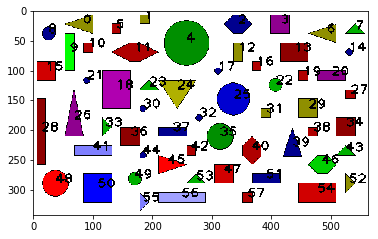

In [46]:
# Se faz uso da funçao findcontours para encontrar os contornos dos objetos contidos
# na imagem filtrada
images, cnts, h = cv2.findContours(image_contour.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# se copia a imagem original e se salva em uma nova variavel
image_object = image.copy()
i = len(cnts)-1

# Para cada contorno de cada objeto encontrado na imagem de entrada (c)
# se calcula seu perimetro, area e centroide
print "Numero de regioes: ",len(cnts)
print ""
for c in cnts:
    # Area
    # Para obter a area aproximada da regiao do objeto usa-se a funçao contourArea
    # Esta funçao calcula a area do contorno do regiao do objeto
    area = cv2.contourArea(c)
    
    # Perimetro
    # Calcula o perimetro ou tamanho do arco da regiao do objeto encontrado na imagem
    perimetro = cv2.arcLength(c,True)
    # Centroide
    # Para obter o centroide se calcula os momentos de terceiro ordem
    # usando a funçao moments
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00']) #se divide o terceiro momento entre o primeiro momento para obter o centroide do objeto no direçao no eixo x
    cy = int(M['m01']/M['m00']) #se divide o segundo momento entre o primeiro momento para obter o centroide do objeto no direçao no eixo y
    
    # Se mostra cada regiao rotulada individualmente na imagem
    cv2.putText(image_object,str(i),(cx,cy), cv2.FONT_HERSHEY_PLAIN, 1.5,(0,0,0),2)
    
    # Imprime-se a informaçao do perimetro e area da regiao de cada objeto
    print " regiao: "+(str(i))+" perimetro: "+str(perimetro)+" area: "+str(area)
    i = i-1
    
# Salva-se a imagem 
cv2.imwrite("count_object_2.png",image_object)
plt.imshow(image_object, cmap=plt.cm.gray)
plt.show() 

In [42]:
# Se faz uso da funçao findcontours para encontrar os contornos da regiao dos objetos contidos
# na imagem filtrada
images, cnts, h = cv2.findContours(image_contour.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Para cada contorno de cada objeto encontrado na imagem de entrada (c)
# se calcula a area, se o calculo é menor a 1500 é uma regiao pequena, maior a 1500 e menor a 3000
# ou maior a 3000 é uma regiao media, e se é maior a 3000 é uma grande regiao
areas = np.array([cv2.contourArea(c) for c in cnts])           
pequeno = len(np.where(areas < 1500)[0])
medio = len(np.where( (1500 < areas) & (areas < 3000))[0])
grande = len(np.where(areas > 3000)[0])

# Imprime-se o numero de regioes por tamanho
print "numero de regioes pequenas:",str(pequeno)
print "numero de regioes medias:",str(medio)
print "numero de regioes grandes:",str(grande)

numero de regioes pequenas: 47
numero de regioes medias: 9
numero de regioes grandes: 2


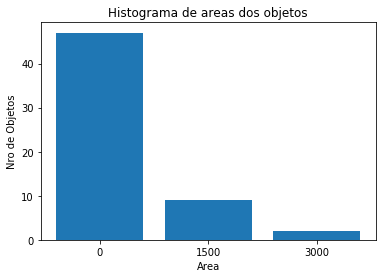

In [47]:
# É definido o rango das areas declaradas anteriormente
n_object = range(0,3500,1500)

# Se guarda o numero de regioes num vetor
n_area = [pequeno,medio,grande]

# Se almacena na variavel regiao o numero de objetos encontrados por numero de regioes por tamanho de area
regiao = np.arange(len(n_area))

# Se representa num bar o numero de objetos por area
plt.bar(regiao, n_area)
plt.xlabel('Area')
plt.ylabel('Nro de Objetos')
plt.xticks(regiao, n_object)
plt.title('Histograma de areas dos objetos')
plt.show()